# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [9]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


from ppn2v.unet import UNet
from ppn2v.pn2v import utils
from ppn2v.pn2v import training
from tifffile import imread

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [10]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://zenodo.org/record/5156960/files/Mouse%20skull%20nuclei.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [11]:
path='../../../data/Mouse skull nuclei/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the noise2void model

Run the cells below

In [12]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse Skull Nuclei` dataset.

In [13]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.38671754822134974+-(2SEM)0.05413903431499268      
Epoch 1 finished      
avg. loss: 0.1817306913435459+-(2SEM)0.011953756089008368      
Epoch 2 finished      
avg. loss: 0.14260849989950658+-(2SEM)0.01822600560998006      
Epoch 3 finished      
avg. loss: 0.1364098649471998+-(2SEM)0.016467289734612766      
Epoch 4 finished      
avg. loss: 0.1413277305662632+-(2SEM)0.01653216963384179      
Epoch 5 finished      
avg. loss: 0.11697129532694817+-(2SEM)0.015962075017504712      
Epoch 6 finished      
avg. loss: 0.12008077353239059+-(2SEM)0.012279862259201052      
Epoch 7 finished      
avg. loss: 0.11695007942616939+-(2SEM)0.010620451315138222      
Epoch 8 finished      
avg. loss: 0.11054107770323754+-(2SEM)0.011924681483812106      
Epoch 9 finished      
avg. loss: 0.10690161883831024+-(2SEM)0.010312315341583595      
Epoch 10 finished      
avg. loss: 0.1158624105155468+-(2SEM)0.014750649010557285      
Epoch 11 finished      
avg. loss: 0.1

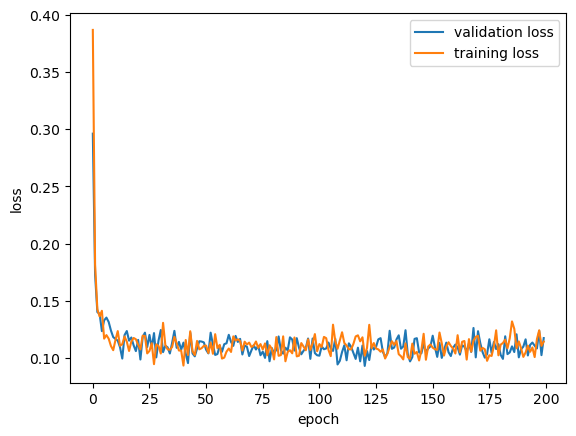

In [14]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()